In [ ]:
!pip install --upgrade diffusers transformers scipy

In [ ]:
!huggingface-cli login

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [ ]:
def get_image_stable_diffusion(prompt):
  with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5) 
    
  # image.save("image.png")
  img = image.images[0]
  return img

In [ ]:
import tensorflow as tf

In [ ]:
IMG_SIZE = 512
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16_MODEL.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
VGG16_MODEL.trainable=False

In [ ]:
img1 = get_image_stable_diffusion("A painting of a baby riding a bike")
img2 = get_image_stable_diffusion("A painting of a baby riding a bike")

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

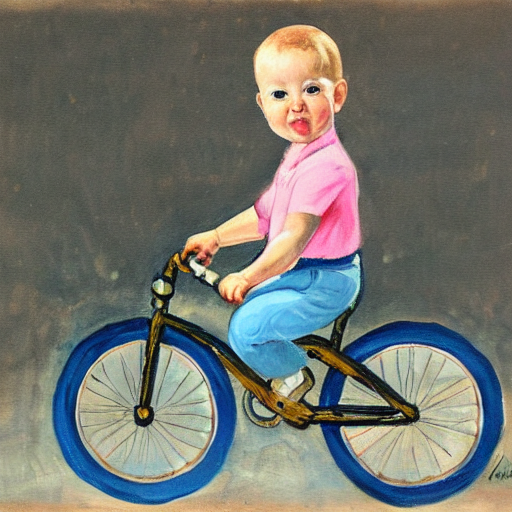

In [ ]:
img1

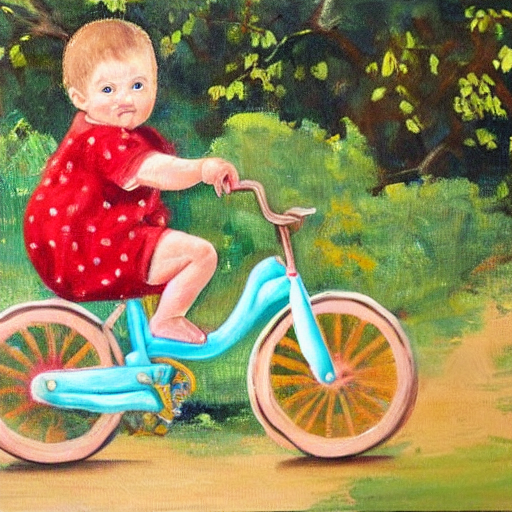

In [ ]:
img2

In [ ]:
from tensorflow.keras.utils import img_to_array
# convert the image pixels to a numpy array
np_img1 = img_to_array(img1)
np_img1 = np_img1.reshape((1, np_img1.shape[0], np_img1.shape[1], np_img1.shape[2]))
np_img2 = img_to_array(img2)
np_img2 = np_img2.reshape((1, np_img2.shape[0], np_img2.shape[1], np_img2.shape[2]))

In [ ]:
emb_img1 = VGG16_MODEL.predict(np_img1)
emb_img2 = VGG16_MODEL.predict(np_img2)

1/1 [==============================] - 0s 26ms/step


In [ ]:
import scipy.spatial as sp
def cosine_similarity(mat1, mat2):
  sim = 1 - sp.distance.cdist(mat1, mat2, 'cosine')
  return sim

In [ ]:
emb_img1.shape

(1, 16, 16, 512)

In [ ]:
cosine_similarity(emb_img1, emb_img2)